In [1]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot
%load_ext autoreload
%autoreload 2

In [2]:
''' [TODO] Figure properties. Specify the csv file and corresponding labels. '''
workload_list = [
    '502',
    '503',
    '505',
    '507',
    '519',
    '520',
    '527',
    '549',
    '554',
    '557',
    'pr.twi',
    'cc.twi',
    'pr.web',
    'cc.web',
    'resnet50',
    'resnext50',
    'YCSB-A',
    'YCSB-B',
    'Geomean',
]
scheme_list = ['Sub-blocking', 'Compression', 'Stage']
workload_dict = {item: item for item in workload_list}
scheme_dict = {item: item for item in scheme_list}

fig_title = 'Performance Breakdown'
fig_name = 'graph_perf_breakdown'
fig_ylim = (0, 1)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1]+0.1, 0.25))
new_color = [
'#b3e2cd',
'#fdcdac',
'#cbd5e8',
'#f4cae4',
'#e6f5c9',
'#fff2ae',
'#f1e2cc',
'#cccccc',
]
baryon_color = new_color[2]
fig_bar_colors = easypyplot.color.color_scale(baryon_color, len(scheme_dict), low=0.7, high=1.0)
assert len(fig_bar_colors) == len(scheme_dict)

# pprint(fig_yticks)

In [3]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.75
fig_dims = (5, 2)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

In [4]:
''' Load data from file. '''
csv_path = './1_performance/breakdown.csv'
csv_hd = pd.read_csv(csv_path, sep=',')
fig_xlabels = []
fig_stage_xticks = []
fig_data_stage_2darr = []
xtick = 1
schemedict1 = [item for item in scheme_dict]
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in schemedict1):
                row_value.append(row[col])
        fig_data_stage_2darr.append(row_value)
        name = workload_fullname
        if workload_fullname.endswith('_r'):
            name = name[:3]
        fig_xlabels.append(name)
        xtick += 2
        fig_stage_xticks.append(xtick)
assert len(fig_data_stage_2darr) == len(fig_xlabels) == len(fig_stage_xticks)
print(fig_data_stage_2darr)

[[0.55, 0.35, 0.11], [0.35, 0.4, 0.25], [0.15, 0.46, 0.39], [0.43, 0.14, 0.43], [0.7, 0.01, 0.29], [0.78, 0.21, 0.01], [0.67, 0.05, 0.28], [0.11, 0.67, 0.23], [0.5, 0.36, 0.14], [0.85, 0.15, 0.0], [0.47, 0.25, 0.28], [0.31, 0.28, 0.41], [0.78, 0.1, 0.12], [0.79, 0.04, 0.18], [0.61, 0.3, 0.09], [0.6, 0.3, 0.1], [0.51, 0.1, 0.39], [0.7, 0.19, 0.1], [0.58, 0.25, 0.17]]


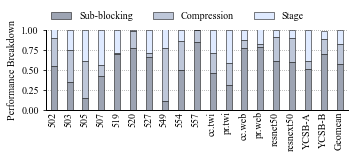

In [5]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.add_subplot(1, 1, 1)
easypyplot.format.turn_off_box(ax)
h = easypyplot.barchart.draw(
    ax, fig_data_stage_2darr,
    width=fig_bar_width,
    breakdown=True,
    group_names=fig_xlabels,
    xticks=fig_stage_xticks,
    # xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=90, # Uncomment this for rotated x tick labels
    colors=fig_bar_colors)

''' x axis '''
ax.xaxis.set_tick_params(pad=-2)
fig_xticks_fix = [item + 0.5 for item in fig_stage_xticks]
ax.set_xticks(fig_xticks_fix)
ax.set_xticklabels(fig_xlabels, fontsize=fig_label_fontsize, fontproperties=ft, ha='right')
ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# ax.tick_params(direction='in') # [in, out, inout]
# ax.set_xlabel(fig_title)

''' y axis '''
ax.yaxis.grid(True)
ax.set_ylim(fig_ylim)
ax.set_yticks(fig_yticks)
str_yticks = ['%.2f' % item for item in fig_yticks]
ax.set_yticklabels(str_yticks, fontsize=fig_label_fontsize, fontproperties=ft)
ax.set_ylabel(fig_title, multialignment='center', fontsize=fig_label_fontsize, fontproperties=ft)

''' legend '''
legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(h, legend, loc='upper center', bbox_to_anchor=(0.5, 1.10),
        ncol=4, frameon=False, prop=ft)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=1.0)

In [6]:
''' Save figures'''
fig.savefig(fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures